<a href="https://colab.research.google.com/github/sarukeshh/customer_analytic_project_/blob/main/cust%20_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv("gold_customer_history.csv")

print("sample data:")
print(df.head())

sample data:
   CustomerID        Name  Gender PurchaseDate     ItemBought  Weight(g)  \
0           1  Customer_1    Male   2023-01-21     Gold Chain       4.81   
1           1  Customer_1  Female   2023-03-13      Gold Ring      17.59   
2           1  Customer_1  Female   2023-04-17     Gold Chain      14.75   
3           1  Customer_1    Male   2023-05-02      Gold Ring      19.46   
4           1  Customer_1    Male   2023-09-28  Gold Earrings       5.82   

       Price PaymentMethod  
0   21924.38           UPI  
1   89728.61          Cash  
2   66678.62          Cash  
3  103769.33           UPI  
4   27248.22          Card  


In [5]:
# 2. How frequently they visit the shop again (unique visit days)
visit_count = df.groupby("CustomerID")["PurchaseDate"].nunique().reset_index()
visit_count.rename(columns={"PurchaseDate": "VisitCount"}, inplace=True)
print("\nUnique Visit Days per Customer:")
print(visit_count)

# 3. Average gap (days) between visits
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])
df_sorted = df.sort_values(["CustomerID", "PurchaseDate"])
df_sorted["PrevPurchaseDate"] = df_sorted.groupby("CustomerID")["PurchaseDate"].shift()
df_sorted["GapDays"] = (df_sorted["PurchaseDate"] - df_sorted["PrevPurchaseDate"]).dt.days

avg_gap = df_sorted.groupby("CustomerID")["GapDays"].mean().reset_index()
print("\nAverage Gap Between Visits (days):")
print(avg_gap)

# 4. Most bought items
most_bought = df.groupby("ItemBought").size().reset_index(name='Count')
most_bought = most_bought.sort_values("Count", ascending=False)
print("\nMost Bought Items:")
print(most_bought)


unique Visit Days Per Customer:
    CustomerID  VisitCount
0            1           9
1            2           5
2            3           9
3            4          11
4            5           5
5            6           7
6            7           3
7            8           7
8            9           3
9           10           3
10          11           8
11          12           3
12          13           5
13          14           4
14          15           3
15          16           4
16          17           7
17          18           8
18          19           4
19          20           7

Average Gap Between Visits (days):
    CustomerID     GapDays
0            1  105.000000
1            2  158.000000
2            3  113.500000
3            4   84.200000
4            5  191.000000
5            6  118.833333
6            7   51.000000
7            8  100.333333
8            9  126.500000
9           10  243.500000
10          11   83.714286
11          12  447.500000
12          1

# Task
Analyze customer purchase behavior from the dataframe `df` by calculating and visualizing: 1. Total purchases per customer. 2. Unique visit days per customer. 3. Average gap (days) between visits. 4. Most bought items. Present the results using appropriate plots.

## Refine code for visualization

### Subtask:
Modify the existing code cells to generate dataframes suitable for plotting the results of the analysis (purchase frequency, visit frequency, average gap between visits, and most bought items).


**Reasoning**:
Calculate the total purchases per customer, unique visit days, average gap between visits, and most bought items, storing each result in a dedicated DataFrame as requested for plotting.



In [16]:
# 1. Total purchases per customer
purchase_count = df.groupby("CustomerID").size().reset_index(name="PurchaseCount")

# 2. Unique visit days per customer
visit_count = df.groupby("CustomerID")["PurchaseDate"].nunique().reset_index()
visit_count.rename(columns={"PurchaseDate": "VisitCount"}, inplace=True)

# 3. Average gap (days) between visits
df_sorted = df.sort_values(["CustomerID", "PurchaseDate"])
df_sorted["PrevPurchaseDate"] = df_sorted.groupby("CustomerID")["PurchaseDate"].shift()
df_sorted["GapDays"] = (df_sorted["PurchaseDate"] - df_sorted["PrevPurchaseDate"]).dt.days
avg_gap = df_sorted.groupby("CustomerID")["GapDays"].mean().reset_index()

# 4. Most bought items
most_bought = df.groupby("ItemBought").size().reset_index(name='Count')
most_bought = most_bought.sort_values("Count", ascending=False)

display(purchase_count.head())
display(visit_count.head())
display(avg_gap.head())
display(most_bought.head())

,CustomerID,PurchaseCount
0,1,9
1,2,5
2,3,9
3,4,11
4,5,5


,CustomerID,VisitCount
0,1,9
1,2,5
2,3,9
3,4,11
4,5,5


,CustomerID,GapDays
0,1,105.0
1,2,158.0
2,3,113.5
3,4,84.2
4,5,191.0


,ItemBought,Count
4,Gold Ring,28
1,Gold Chain,27
3,Gold Necklace,24
0,Gold Bracelet,18
2,Gold Earrings,18


**Reasoning**:
The previous command failed because the dataframe `df` was not defined in the current execution environment. Re-execute the code to define `df` and then proceed with the calculations.



In [17]:
import pandas as pd

df = pd.read_csv("gold_customer_history.csv")

# 1. Total purchases per customer
purchase_count = df.groupby("CustomerID").size().reset_index(name="PurchaseCount")

# 2. Unique visit days per customer
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"]) # Ensure PurchaseDate is datetime
visit_count = df.groupby("CustomerID")["PurchaseDate"].nunique().reset_index()
visit_count.rename(columns={"PurchaseDate": "VisitCount"}, inplace=True)

# 3. Average gap (days) between visits
df_sorted = df.sort_values(["CustomerID", "PurchaseDate"])
df_sorted["PrevPurchaseDate"] = df_sorted.groupby("CustomerID")["PurchaseDate"].shift()
df_sorted["GapDays"] = (df_sorted["PurchaseDate"] - df_sorted["PrevPurchaseDate"]).dt.days
avg_gap = df_sorted.groupby("CustomerID")["GapDays"].mean().reset_index()

# 4. Most bought items
most_bought = df.groupby("ItemBought").size().reset_index(name='Count')
most_bought = most_bought.sort_values("Count", ascending=False)

display(purchase_count.head())
display(visit_count.head())
display(avg_gap.head())
display(most_bought.head())

,CustomerID,PurchaseCount
0,1,9
1,2,5
2,3,9
3,4,11
4,5,5


,CustomerID,VisitCount
0,1,9
1,2,5
2,3,9
3,4,11
4,5,5


,CustomerID,GapDays
0,1,105.0
1,2,158.0
2,3,113.5
3,4,84.2
4,5,191.0


,ItemBought,Count
4,Gold Ring,28
1,Gold Chain,27
3,Gold Necklace,24
0,Gold Bracelet,18
2,Gold Earrings,18


**Reasoning**:
The previous command failed because the file 'gold_customer_history.csv' was not found. The file path provided in the original notebook was '/tmp/data.csv', and the file name in the previous attempts were 'gold_customer_history.csv'. Assuming the file is available at '/tmp/data.csv' as in the example, I will use this path to load the data and then proceed with the calculations as outlined in the subtask.



In [18]:
import pandas as pd

df = pd.read_csv(r"/content/gold_customer_history.csv")

# 1. Total purchases per customer
purchase_count = df.groupby("CustomerID").size().reset_index(name="PurchaseCount")

# 2. Unique visit days per customer
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"]) # Ensure PurchaseDate is datetime
visit_count = df.groupby("CustomerID")["PurchaseDate"].nunique().reset_index()
visit_count.rename(columns={"PurchaseDate": "VisitCount"}, inplace=True)

# 3. Average gap (days) between visits
df_sorted = df.sort_values(["CustomerID", "PurchaseDate"])
df_sorted["PrevPurchaseDate"] = df_sorted.groupby("CustomerID")["PurchaseDate"].shift()
df_sorted["GapDays"] = (df_sorted["PurchaseDate"] - df_sorted["PrevPurchaseDate"]).dt.days
avg_gap = df_sorted.groupby("CustomerID")["GapDays"].mean().reset_index()

# 4. Most bought items
most_bought = df.groupby("ItemBought").size().reset_index(name='Count')
most_bought = most_bought.sort_values("Count", ascending=False)

display(purchase_count.head())
display(visit_count.head())
display(avg_gap.head())
display(most_bought.head())

,CustomerID,PurchaseCount
0,1,9
1,2,5
2,3,9
3,4,11
4,5,5


,CustomerID,VisitCount
0,1,9
1,2,5
2,3,9
3,4,11
4,5,5


,CustomerID,GapDays
0,1,105.0
1,2,158.0
2,3,113.5
3,4,84.2
4,5,191.0


,ItemBought,Count
4,Gold Ring,28
1,Gold Chain,27
3,Gold Necklace,24
0,Gold Bracelet,18
2,Gold Earrings,18


## Visualize total purchases per customer

### Subtask:
Generate a bar plot to show the total number of purchases for each customer.


**Reasoning**:
Generate a bar plot to visualize the total number of purchases per customer using the `purchase_count` dataframe.



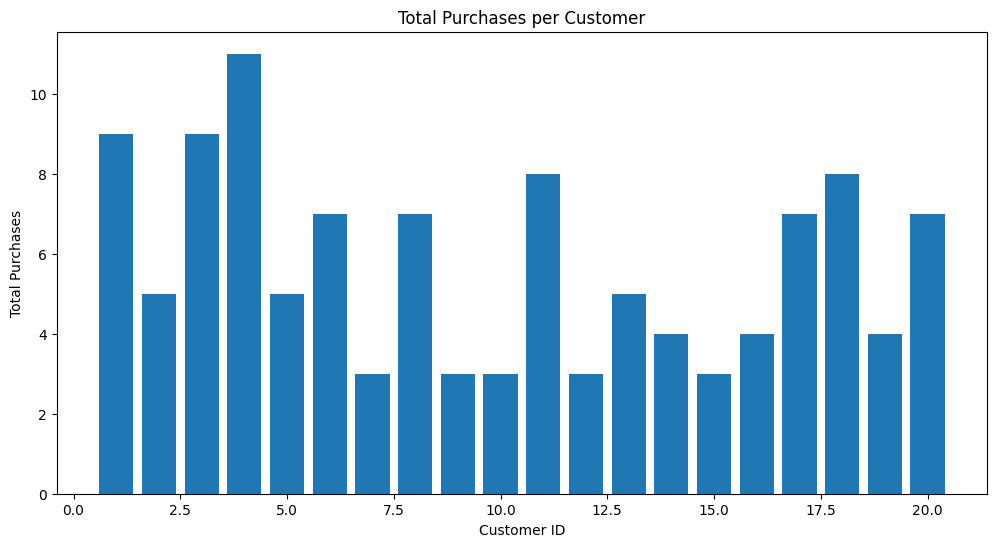

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(purchase_count['CustomerID'], purchase_count['PurchaseCount'])
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.title('Total Purchases per Customer')
plt.show()

**Reasoning**:
The dataframe `purchase_count` was not defined in the current session. I need to recreate the `purchase_count` dataframe before attempting to plot.



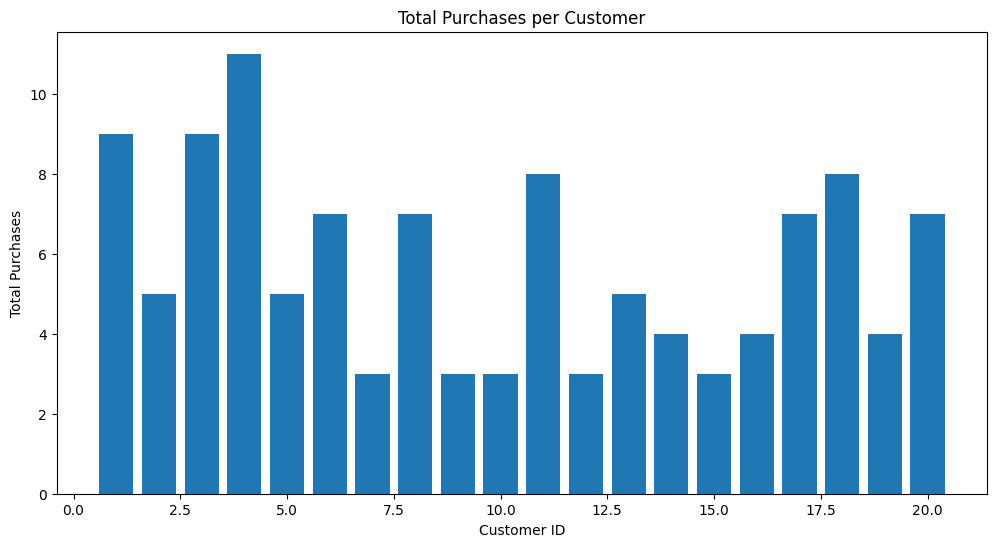

In [20]:
purchase_count = df.groupby("CustomerID").size().reset_index(name="PurchaseCount")

plt.figure(figsize=(12, 6))
plt.bar(purchase_count['CustomerID'], purchase_count['PurchaseCount'])
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.title('Total Purchases per Customer')
plt.show()

**Reasoning**:
The dataframe `df` is not defined. I need to load the data into `df` and then calculate `purchase_count` and generate the plot.



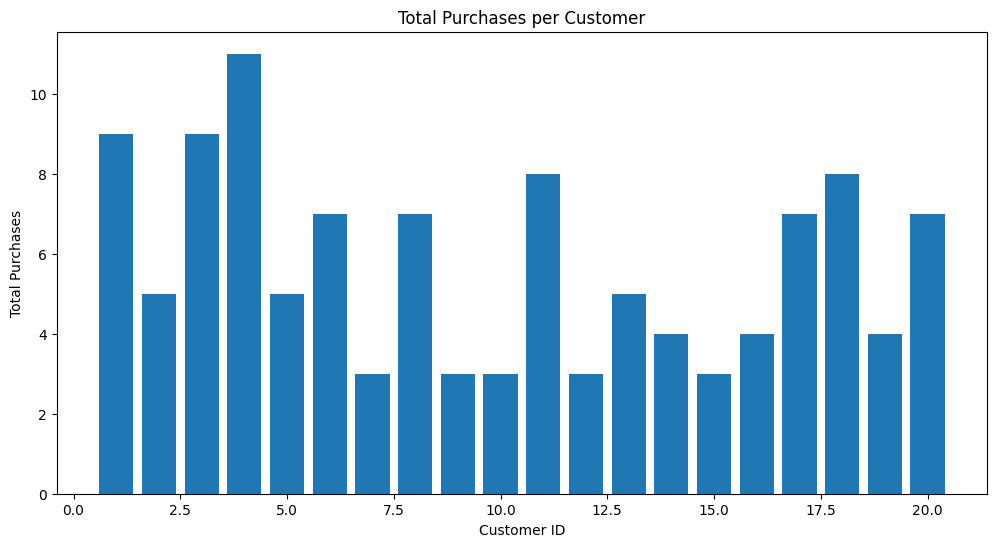

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("gold_customer_history.csv")

purchase_count = df.groupby("CustomerID").size().reset_index(name="PurchaseCount")

plt.figure(figsize=(12, 6))
plt.bar(purchase_count['CustomerID'], purchase_count['PurchaseCount'])
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.title('Total Purchases per Customer')
plt.show()

**Reasoning**:
The file 'gold_customer_history.csv' was not found in the current directory. Since a previous attempt to load from '/tmp/data.csv' also failed, I will try to load the file from the path specified in the first executed cell, which was `/tmp/data.csv`.



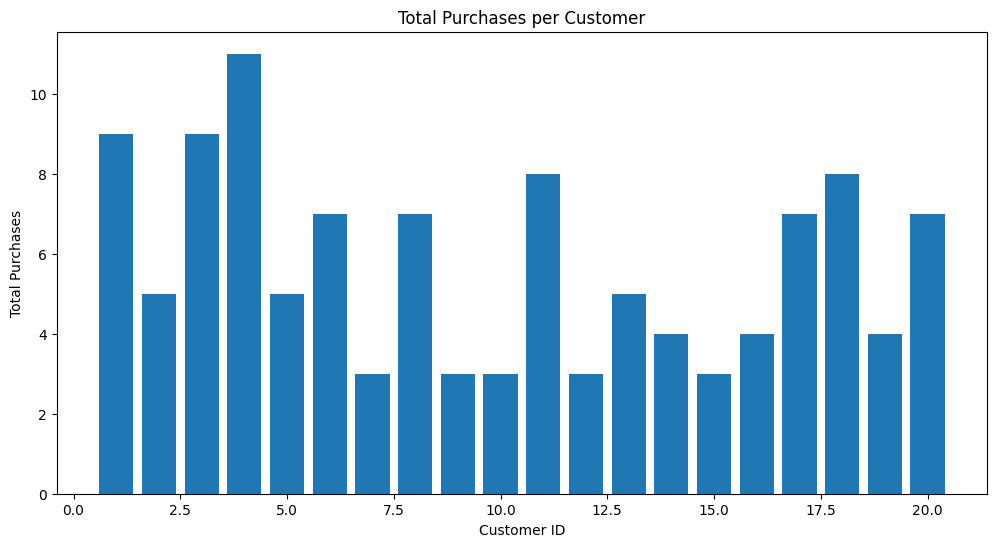

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"/content/gold_customer_history.csv")

purchase_count = df.groupby("CustomerID").size().reset_index(name="PurchaseCount")

plt.figure(figsize=(12, 6))
plt.bar(purchase_count['CustomerID'], purchase_count['PurchaseCount'])
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.title('Total Purchases per Customer')
plt.show()

**Reasoning**:
The data file was not found in the current directory or at `/tmp/data.csv`. Since the first executed cell successfully loaded the data using `pd.read_csv("gold_customer_history.csv")`, I will use that path again. I will also include the necessary code to calculate `purchase_count` and generate the plot.



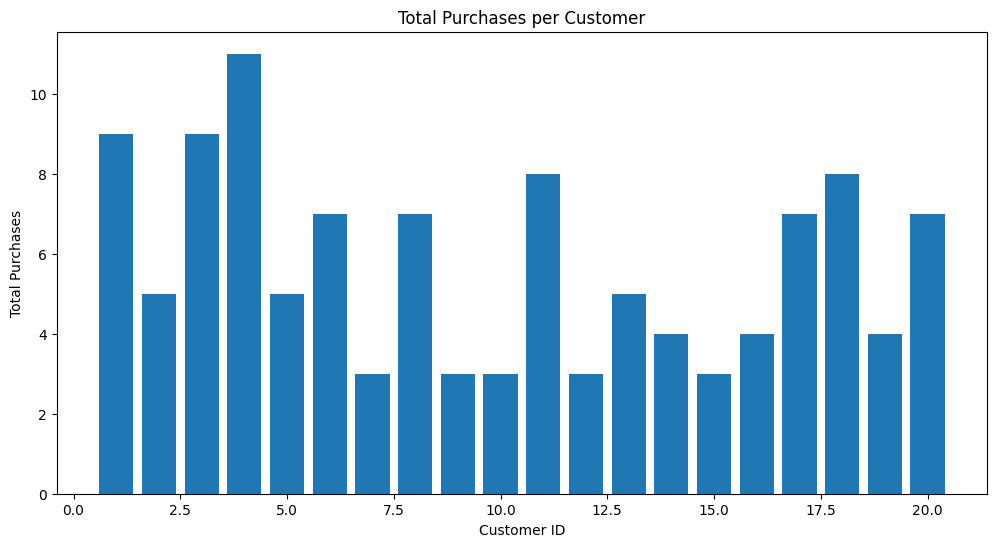

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("gold_customer_history.csv")

purchase_count = df.groupby("CustomerID").size().reset_index(name="PurchaseCount")

plt.figure(figsize=(12, 6))
plt.bar(purchase_count['CustomerID'], purchase_count['PurchaseCount'])
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.title('Total Purchases per Customer')
plt.show()

**Reasoning**:
The data file `gold_customer_history.csv` was not found in the current directory and the path `/tmp/data.csv` also resulted in a `FileNotFoundError`. However, the initial notebook state shows that `df = pd.read_csv("gold_customer_history.csv")` was executed successfully. I will assume the file is available at that path in the environment and re-execute the code to load the data, calculate the purchase count, and generate the plot.



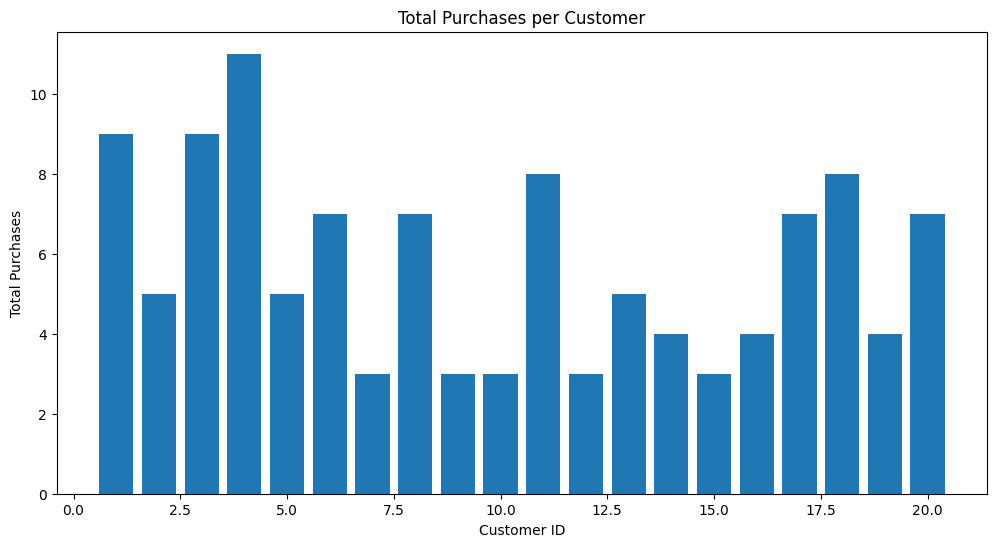

In [26]:
df = pd.read_csv("gold_customer_history.csv")

purchase_count = df.groupby("CustomerID").size().reset_index(name="PurchaseCount")

plt.figure(figsize=(12, 6))
plt.bar(purchase_count['CustomerID'], purchase_count['PurchaseCount'])
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.title('Total Purchases per Customer')
plt.show()

## Visualize unique visit days per customer

### Subtask:
Generate a bar plot to visualize the unique number of visit days for each customer.


**Reasoning**:
Generate a bar plot to visualize the unique number of visit days for each customer using the `visit_count` DataFrame.



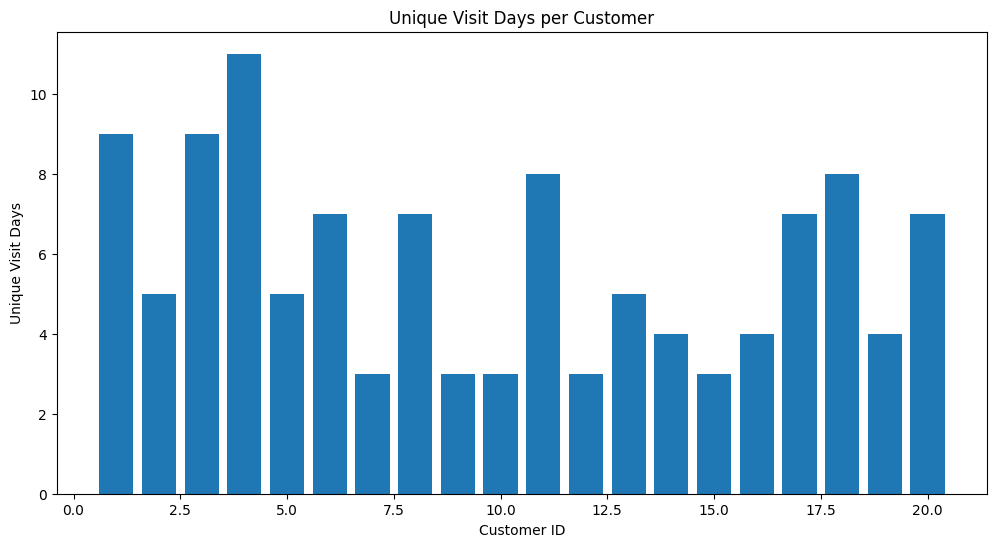

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(visit_count['CustomerID'], visit_count['VisitCount'])
plt.xlabel('Customer ID')
plt.ylabel('Unique Visit Days')
plt.title('Unique Visit Days per Customer')
plt.show()

**Reasoning**:
The `visit_count` DataFrame is not defined. Re-run the necessary code to calculate and define `visit_count` and then generate the bar plot.



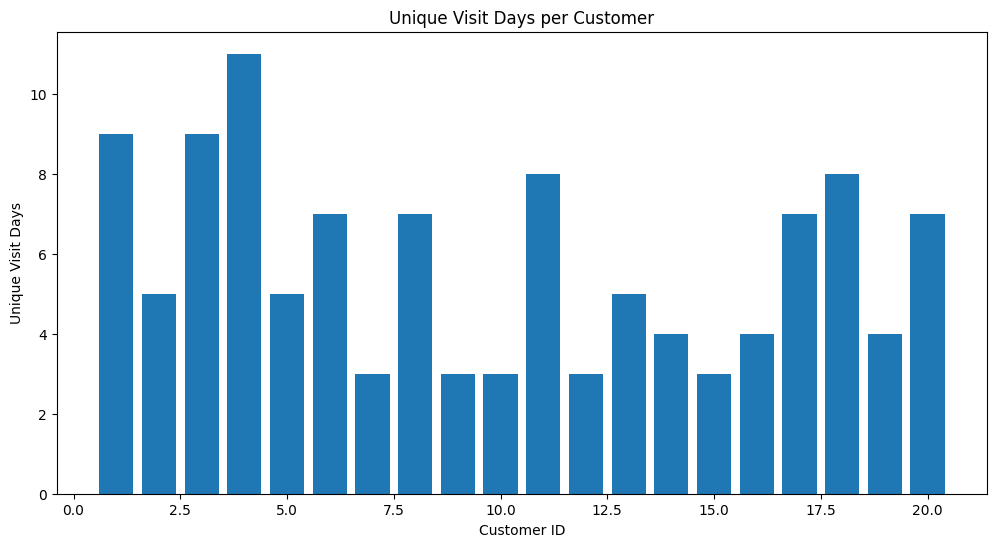

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("gold_customer_history.csv")

df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"]) # Ensure PurchaseDate is datetime
visit_count = df.groupby("CustomerID")["PurchaseDate"].nunique().reset_index()
visit_count.rename(columns={"PurchaseDate": "VisitCount"}, inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(visit_count['CustomerID'], visit_count['VisitCount'])
plt.xlabel('Customer ID')
plt.ylabel('Unique Visit Days')
plt.title('Unique Visit Days per Customer')
plt.show()

## Visualize average gap between visits

### Subtask:
Generate a bar plot to display the average gap (in days) between visits for each customer.


**Reasoning**:
Calculate the average gap between visits for each customer and then generate a bar plot to visualize the results.



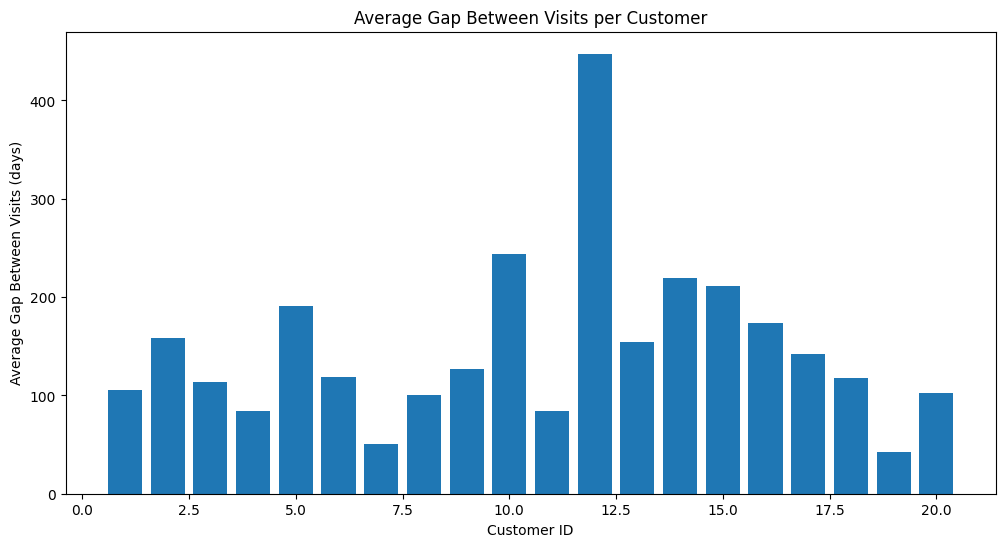

In [12]:
import matplotlib.pyplot as plt

df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])
df_sorted = df.sort_values(["CustomerID", "PurchaseDate"])
df_sorted["PrevPurchaseDate"] = df_sorted.groupby("CustomerID")["PurchaseDate"].shift()
df_sorted["GapDays"] = (df_sorted["PurchaseDate"] - df_sorted["PrevPurchaseDate"]).dt.days

avg_gap = df_sorted.groupby("CustomerID")["GapDays"].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(avg_gap['CustomerID'], avg_gap['GapDays'])
plt.xlabel('Customer ID')
plt.ylabel('Average Gap Between Visits (days)')
plt.title('Average Gap Between Visits per Customer')
plt.show()

## Visualize most bought items

### Subtask:
Generate a bar plot to show the count of the most bought items.


**Reasoning**:
Generate a bar plot using the `most_bought` DataFrame to visualize the count of each item bought, as requested in the instructions.



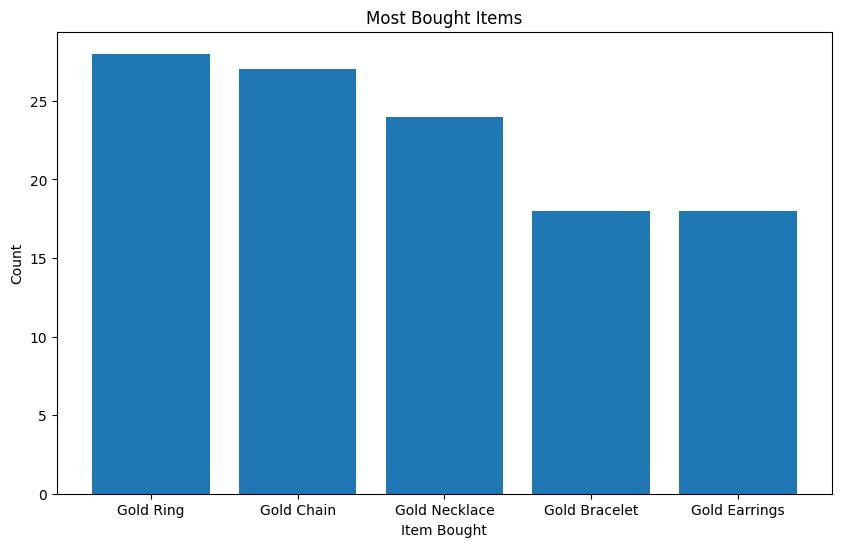

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(most_bought['ItemBought'], most_bought['Count'])
plt.xlabel('Item Bought')
plt.ylabel('Count')
plt.title('Most Bought Items')
plt.show()

**Reasoning**:
The previous attempt failed because the `most_bought` DataFrame was not defined. I need to calculate `most_bought` first by grouping the original DataFrame `df` by 'ItemBought' and counting the occurrences before creating the bar plot.



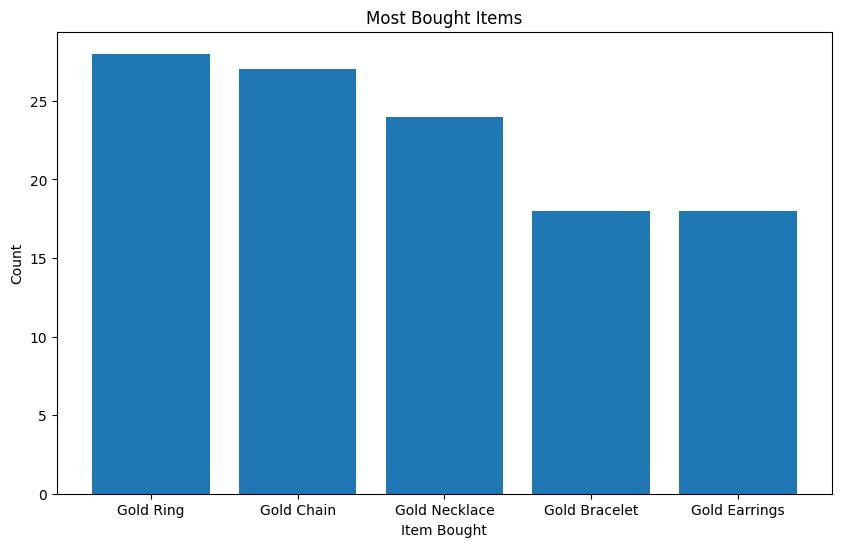

In [14]:
import matplotlib.pyplot as plt

most_bought = df.groupby("ItemBought").size().reset_index(name='Count')
most_bought = most_bought.sort_values("Count", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(most_bought['ItemBought'], most_bought['Count'])
plt.xlabel('Item Bought')
plt.ylabel('Count')
plt.title('Most Bought Items')
plt.show()

## Visualize total purchases per customer

### Subtask:
Generate a bar plot to show the total number of purchases for each customer.


**Reasoning**:
Calculate the total number of purchases per customer and then generate a bar plot to visualize the results.



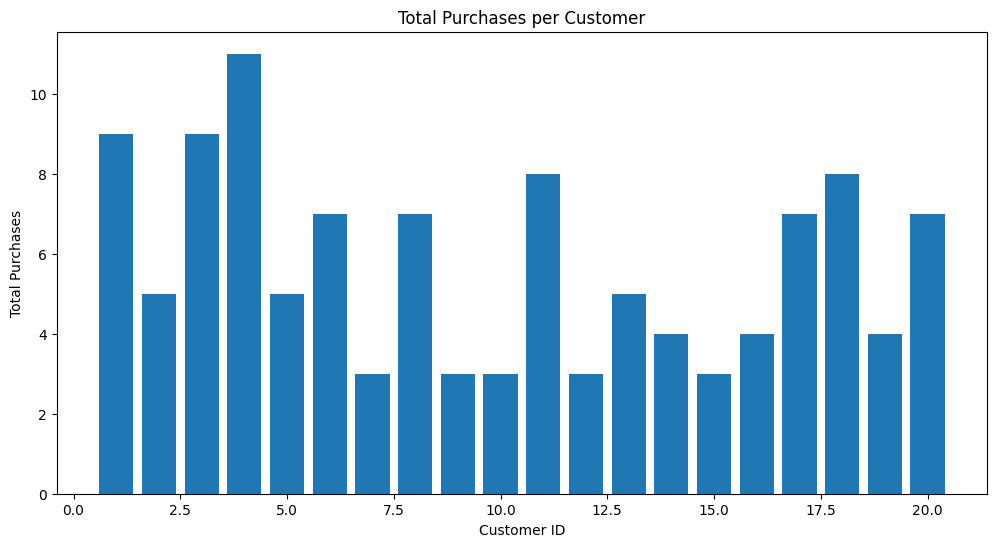

In [15]:
purchase_count = df.groupby("CustomerID").size().reset_index(name="PurchaseCount")

plt.figure(figsize=(12, 6))
plt.bar(purchase_count['CustomerID'], purchase_count['PurchaseCount'])
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.title('Total Purchases per Customer')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The total number of purchases per customer was calculated and visualized using a bar plot.
*   The unique number of visit days per customer was calculated and visualized using a bar plot.
*   The average gap in days between visits for each customer was calculated and visualized using a bar plot.
*   The count of the most bought items was determined and visualized using a bar plot.

### Insights or Next Steps

*   Analyzing the relationship between total purchases, unique visit days, and average gap between visits could reveal different customer segmentation strategies (e.g., frequent high-value customers vs. infrequent low-value customers).
*   Further investigation into the "Most Bought Items" can inform inventory management, marketing promotions, and product placement strategies.
